In [2]:
import networkx as nx
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

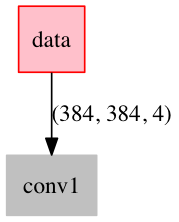

In [8]:
G = nx.DiGraph()
G.graph['rankdir'] = 'TD'
G.graph['dpi'] = 120
G.add_node('data', color='red', style='filled', shape='square', fillcolor='pink')
G.add_node('conv1', color='gray', style='filled', shape='cube', fillcolor='gray')
G.add_edge('data', 'conv1', label='(384, 384, 4)')
# G.add_cycle(range(4))
# G.add_node(0, color='red', style='filled', fillcolor='pink')
# G.add_node(1, shape='square')
# G.add_node(3, style='filled', fillcolor='#00ffff')
# G.add_edge(0, 1, color='red', style='dashed')
# G.add_edge(3, 3, label='a')
draw(G)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

In [15]:
import numpy as np

In [67]:
def add_layer(patches, colors, size=24, num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size])
    for ind in range(num):
        print(loc_start + ind * loc_diff, size)
        patches.append(Rectangle(loc_start + ind * loc_diff, size, size))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)

In [72]:
patches = []
colors = []

fc_unit_size = 2
layer_width = 40

NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Black = 0.


size_list = [32, 18] #, 10, 6, 4]
num_list = [3, 32, 32, 48, 48]
x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

(array([  0., -32.]), 32)
(array([  3., -35.]), 32)
(array([  6., -38.]), 32)
(array([ 40., -18.]), 18)
(array([ 43., -21.]), 18)
(array([ 46., -24.]), 18)
(array([ 49., -27.]), 18)
(array([ 52., -30.]), 18)
(array([ 55., -33.]), 18)
(array([ 58., -36.]), 18)
(array([ 61., -39.]), 18)


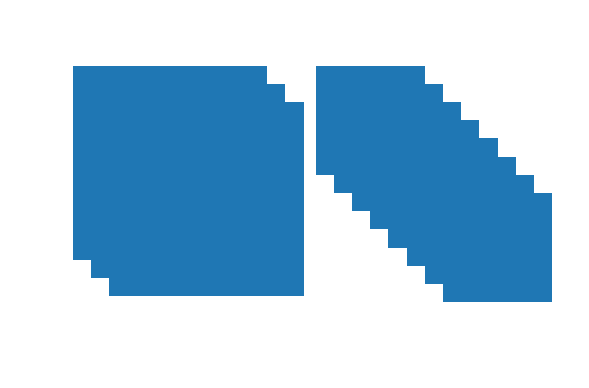

In [73]:
fig, ax = plt.subplots()
for ind in range(len(size_list)):
    add_layer(patches, colors, size=size_list[ind],
              num=num_show_list[ind],
              top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    
# xys = np.array([[  0., -32.],
#                 [  3., -32.],
#                 [  6., -32.],
#                 [ 40., -18.],
#                 [ 43., -21.],
#                 [ 46., -24.],
#                 [ 49., -27.],
#                 [ 52., -30.],
#                 [ 55., -33.],
#                 [ 58., -36.],
#                 [ 61., -39.],])

# for xy in xys:
#     patches.append(Rectangle(xy, 24, 24))
# patches.append(Rectangle(loc_start * loc_diff, size, size))

collection = PatchCollection(patches, cmap=plt.cm.gray)
# collection.set_array(colors)
ax.add_collection(collection)
plt.tight_layout()
plt.axis('equal')
plt.axis('off')
plt.show()